# Описание датасета:

Задача заключается в прогнозировании стоимости ноутбука на основе его технических характеристик, таких как марка или производитель ноутбука, тип ноутбука, объем оперативной памяти, размер дисплея, торговая марка графического процессора и других параметров. Это задача регрессии, где целевая переменная — цена ноутбука (Price_euros), и мы пытаемся найти зависимость цены от остальных характеристик.

In [352]:
import pandas as pd
import numpy as np

data = pd.read_csv('Laptop-Price.csv')
data

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


In [353]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'OpSys', 'Cpu Brand', 'Cpu Model', 'Cpu Rate', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Gpu Brand', 'Gpu Model', 'Unnamed: 16',
       'Price_euros'],
      dtype='object')

In [354]:
data['Company'] = data['Company'].astype('category')
data['Gpu Brand'] = data['Gpu Brand'].astype('category')
data['Product'] = data['Product'].astype('category')
data['TypeName'] = data['TypeName'].astype('category')
data['ScreenResolution'] = data['ScreenResolution'].astype('category')
data['Cpu Model'] = data['Cpu Model'].astype('category')
data['Gpu Brand'] = data['Gpu Brand'].astype('category')
data['Cpu Brand'] = data['Cpu Brand'].astype('category')


Удалим лишние столбцы 'Unnamed: 16', 'Hybrid':

In [355]:
column_for_remove1=["Unnamed: 16"]
column_for_remove2=["Hybrid"]
data = data.drop(columns = column_for_remove1)
data = data.drop(columns = column_for_remove2)
data

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,Intel,HD Graphics 620,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,AMD,Radeon R5,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,Nvidia,GeForce MX150,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,Intel,UHD Graphics 620,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,Intel,HD Graphics 620,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,AMD,Radeon R5 M430,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,Nvidia,GeForce 920M,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,Intel,HD Graphics 520,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,Intel,HD Graphics 520,1499.00


# Рассчет квантиля

Известно, что, цена ноутбука зависит от компании, которая выпустила этот ноутбук. Построим график зависимости столбцa "Price_euros" от столбца "Company"

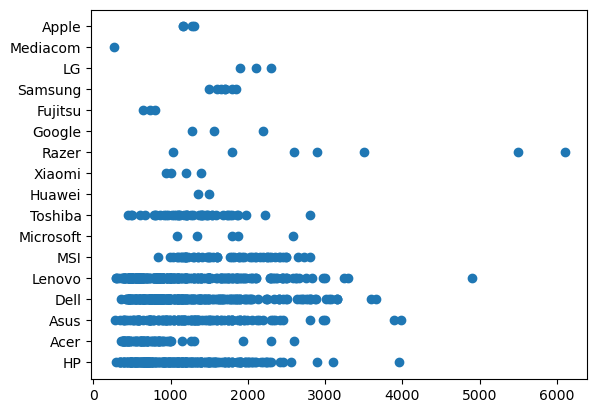

In [356]:
plt.scatter(data['Price_euros'], data['Company'])
pass

Видны выбросы при значениях 'Price_euros' 5000-6000 евро. Уберем этот недостаток, для этого посчитаем квантиль:

In [357]:
data['Price_euros'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     324.225
0.010     353.500
0.050     444.475
0.100     499.000
0.500    1049.750
0.900    2092.240
0.950    2454.755
0.990    3151.750
0.995    3722.815
Name: Price_euros, dtype: float64

Видим, что 99% всех значений признака 'Price_euros' находится в диапазоне от 324.225 до 3722.815 евро. Удалим все строки таблицы, в которых 'Price_euros' выходят за пределы квантилей 0.005 и 0.995

In [358]:
rows_to_drop = data[(data['Price_euros'] < data['Price_euros'].quantile(0.005)) | (data['Price_euros'] > data['Price_euros'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,Intel,HD Graphics 620,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,AMD,Radeon R5,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,Nvidia,GeForce MX150,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,Intel,UHD Graphics 620,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,Intel,HD Graphics 620,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,AMD,Radeon R5 M430,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,Nvidia,GeForce 920M,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,Intel,HD Graphics 520,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,Intel,HD Graphics 520,1499.00


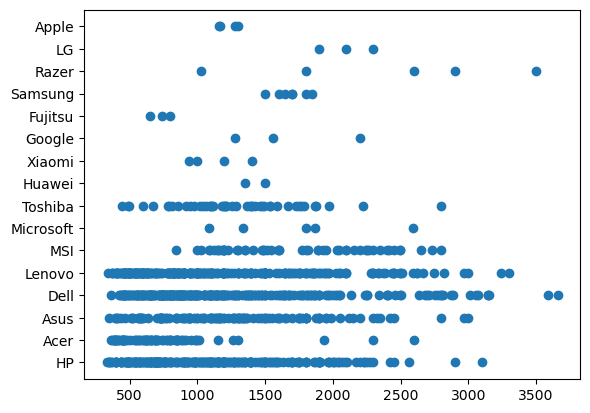

In [359]:
plt.scatter(data['Price_euros'], data['Company'])
pass

# Преобразование данных

Приведем необходимые данные к численному виду

In [360]:
# Оставляем только строки, где Processor_Brand равен Intel или AMD
data = data[data['Cpu Brand'].isin(['Intel', 'AMD'])]

In [361]:
OpSys_dummies = pd.get_dummies(data['OpSys'])
data = pd.concat((data, OpSys_dummies), axis=1)
data=data.drop(['OpSys'], axis=1)

Gpu_Brand_dummies = pd.get_dummies(data['Gpu Brand'])
data = pd.concat((data, Gpu_Brand_dummies), axis=1)
data=data.drop(['Gpu Brand'], axis=1)

TypeName_dummies = pd.get_dummies(data['TypeName'])
data = pd.concat((data, TypeName_dummies), axis=1)
data=data.drop(['TypeName'], axis=1)

data.head()

,Company,Product,Inches,ScreenResolution,Ram,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,HP,250 G6,15.6,Full HD 1920x1080,8GB,Intel,Core i5 7200U,2.5GHz,256,0,...,0,0,1,0,0,0,0,1,0,0
1,Acer,Aspire 3,15.6,1366x768,4GB,AMD,A9-Series 9420,3GHz,0,500,...,0,1,0,0,0,0,0,1,0,0
2,Asus,ZenBook UX430UN,14.0,Full HD 1920x1080,16GB,Intel,Core i7 8550U,1.8GHz,512,0,...,0,0,0,1,0,0,0,0,1,0
3,Acer,Swift 3,14.0,IPS Panel Full HD 1920x1080,8GB,Intel,Core i5 8250U,1.6GHz,256,0,...,0,0,1,0,0,0,0,0,1,0
4,HP,250 G6,15.6,1366x768,4GB,Intel,Core i5 7200U,2.5GHz,0,500,...,0,0,1,0,0,0,0,1,0,0


In [362]:
data['Ram'] = data['Ram'].str.extract(r'(\d+)')[0]
data['Ram'] = pd.to_numeric(data['Ram'], errors='coerce').fillna(0).astype(int)

data['Cpu Rate'] = data['Cpu Rate'].str.extract(r'(\d+)')[0]
data['Cpu Rate'] = pd.to_numeric(data['Cpu Rate'], errors='coerce').fillna(0).astype(float)

data.head()

,Company,Product,Inches,ScreenResolution,Ram,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,HP,250 G6,15.6,Full HD 1920x1080,8,Intel,Core i5 7200U,2.0,256,0,...,0,0,1,0,0,0,0,1,0,0
1,Acer,Aspire 3,15.6,1366x768,4,AMD,A9-Series 9420,3.0,0,500,...,0,1,0,0,0,0,0,1,0,0
2,Asus,ZenBook UX430UN,14.0,Full HD 1920x1080,16,Intel,Core i7 8550U,1.0,512,0,...,0,0,0,1,0,0,0,0,1,0
3,Acer,Swift 3,14.0,IPS Panel Full HD 1920x1080,8,Intel,Core i5 8250U,1.0,256,0,...,0,0,1,0,0,0,0,0,1,0
4,HP,250 G6,15.6,1366x768,4,Intel,Core i5 7200U,2.0,0,500,...,0,0,1,0,0,0,0,1,0,0


# Статистика по датасету:

Сводную информацию о признаках можем получить, вызва метод descride:

In [363]:
data.describe()

,Inches,Ram,Cpu Rate,SSD,HDD,Flash Storage,Price_euros,Chrome OS,Linux,Mac OS X,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,...,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,15.141975,8.772487,1.865079,188.508818,45.044974,1.918871,1191.121358,0.003527,0.044974,0.003527,...,0.037919,0.148148,0.508818,0.343034,0.092593,0.176367,0.005291,0.545855,0.156085,0.023810
std,1.317310,4.621919,0.407733,159.753118,142.373162,26.413250,623.554473,0.059313,0.207337,0.059313,...,0.191084,0.355404,0.500143,0.474932,0.289989,0.381300,0.072579,0.498113,0.363096,0.152523
min,11.300000,4.000000,0.000000,0.000000,0.000000,0.000000,330.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,6.000000,2.000000,0.000000,0.000000,0.000000,706.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.000000,256.000000,0.000000,0.000000,1049.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.600000,8.000000,2.000000,256.000000,1.000000,0.000000,1529.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,18.400000,32.000000,3.000000,512.000000,500.000000,512.000000,3659.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [364]:
data.describe(include=['category'])

,Company,Product,ScreenResolution,Cpu Brand,Cpu Model
count,1134,1134,1134,1134,1134
unique,16,521,33,2,60
top,Dell,XPS 13,Full HD 1920x1080,Intel,Core i5 7200U
freq,284,30,493,1081,193


Построим все возможные диаграммы для каждой пары переменных:

array([[<AxesSubplot:xlabel='Inches', ylabel='Inches'>,
        <AxesSubplot:xlabel='Ram', ylabel='Inches'>,
        <AxesSubplot:xlabel='Cpu Rate', ylabel='Inches'>,
        <AxesSubplot:xlabel='SSD', ylabel='Inches'>,
        <AxesSubplot:xlabel='HDD', ylabel='Inches'>,
        <AxesSubplot:xlabel='Flash Storage', ylabel='Inches'>,
        <AxesSubplot:xlabel='Price_euros', ylabel='Inches'>,
        <AxesSubplot:xlabel='Chrome OS', ylabel='Inches'>,
        <AxesSubplot:xlabel='Linux', ylabel='Inches'>,
        <AxesSubplot:xlabel='Mac OS X', ylabel='Inches'>,
        <AxesSubplot:xlabel='No OS', ylabel='Inches'>,
        <AxesSubplot:xlabel='Windows 10', ylabel='Inches'>,
        <AxesSubplot:xlabel='Windows 10 S', ylabel='Inches'>,
        <AxesSubplot:xlabel='Windows 7', ylabel='Inches'>,
        <AxesSubplot:xlabel='AMD', ylabel='Inches'>,
        <AxesSubplot:xlabel='Intel', ylabel='Inches'>,
        <AxesSubplot:xlabel='Nvidia', ylabel='Inches'>,
        <AxesSubplot:xlabel='2 

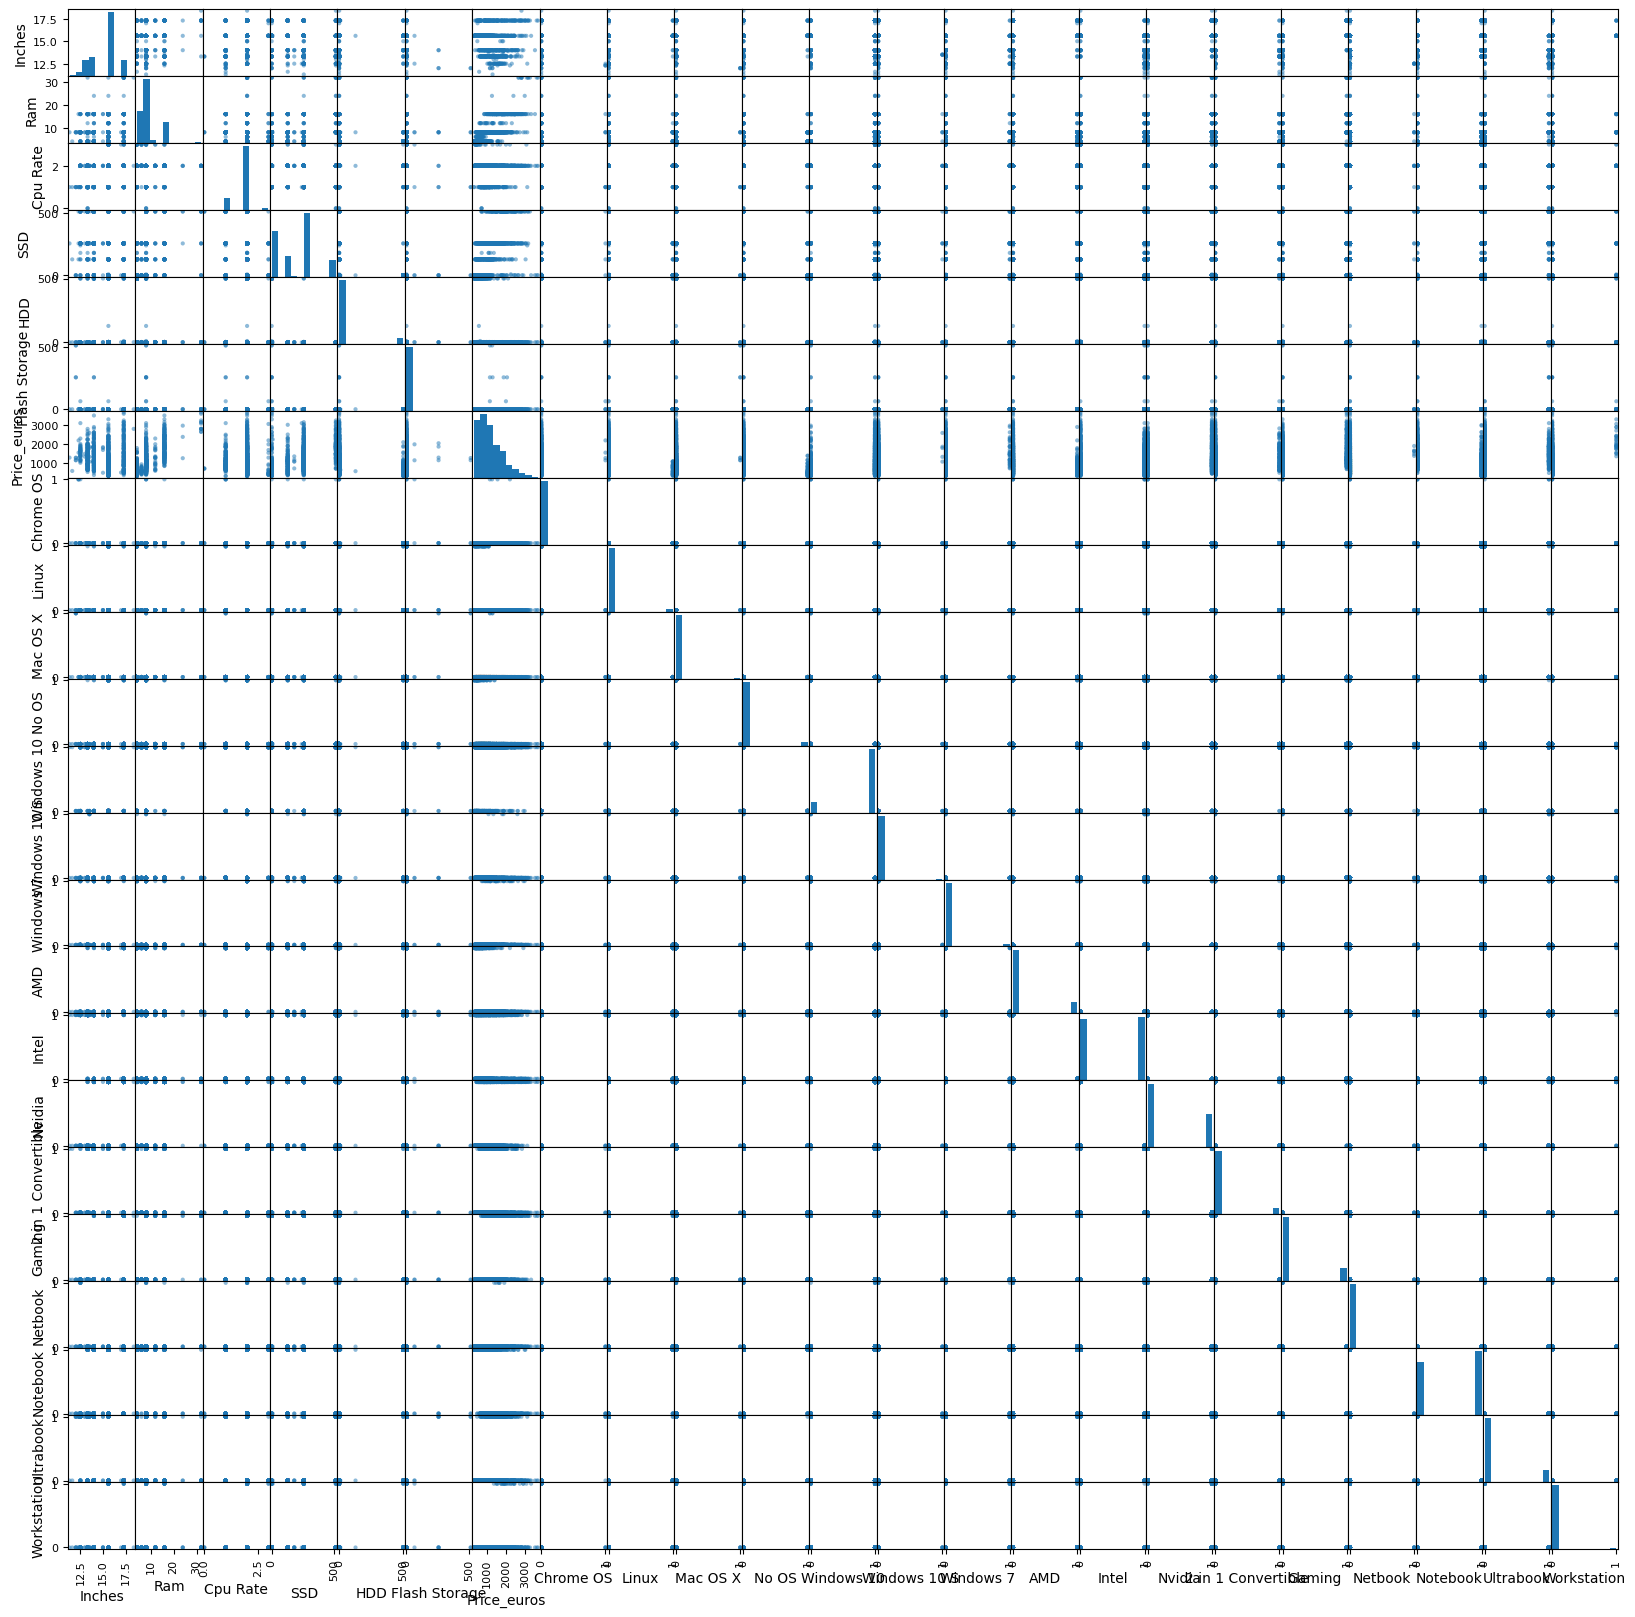

In [365]:
pd.plotting.scatter_matrix(data, figsize = (20, 20))

# Cредние значения и разброс

In [366]:
mean_values = data.mean()
print("Средние значения:\n", mean_values)

Средние значения:
 Inches                  15.141975
Ram                      8.772487
Cpu Rate                 1.865079
SSD                    188.508818
HDD                     45.044974
Flash Storage            1.918871
Price_euros           1191.121358
Chrome OS                0.003527
Linux                    0.044974
Mac OS X                 0.003527
No OS                    0.049383
Windows 10               0.856261
Windows 10 S             0.004409
Windows 7                0.037919
AMD                      0.148148
Intel                    0.508818
Nvidia                   0.343034
2 in 1 Convertible       0.092593
Gaming                   0.176367
Netbook                  0.005291
Notebook                 0.545855
Ultrabook                0.156085
Workstation              0.023810
dtype: float64


C:\Users\annas\AppData\Local\Temp\ipykernel_11804\1346449542.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = data.mean()


In [367]:
variance_values = data.var()
print("\nРазброс (дисперсия):\n", variance_values)


Разброс (дисперсия):
 Inches                     1.735306
Ram                       21.362137
Cpu Rate                   0.166246
SSD                    25521.058616
HDD                    20270.117128
Flash Storage            697.659785
Price_euros           388820.180615
Chrome OS                  0.003518
Linux                      0.042989
Mac OS X                   0.003518
No OS                      0.046985
Windows 10                 0.123187
Windows 10 S               0.004394
Windows 7                  0.036513
AMD                        0.126312
Intel                      0.250143
Nvidia                     0.225560
2 in 1 Convertible         0.084093
Gaming                     0.145390
Netbook                    0.005268
Notebook                   0.248116
Ultrabook                  0.131838
Workstation                0.023263
dtype: float64


C:\Users\annas\AppData\Local\Temp\ipykernel_11804\1921891873.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values = data.var()


Матрица корреляции для количественных признаков:

In [368]:
corr_mat = data.corr()
corr_mat

,Inches,Ram,Cpu Rate,SSD,HDD,Flash Storage,Price_euros,Chrome OS,Linux,Mac OS X,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Inches,1.000000,0.165553,0.169128,-0.255437,0.037511,-0.140798,-0.070298,-0.126155,0.079686,-0.141970,...,-0.111870,0.204636,-0.607553,0.486669,-0.285823,0.414702,-0.146337,0.212549,-0.504922,0.084197
Ram,0.165553,1.000000,-0.017708,0.458370,-0.287865,-0.012153,0.704882,0.015808,-0.095231,-0.009948,...,-0.045188,-0.139582,-0.263348,0.381779,0.040096,0.467516,-0.001671,-0.444010,0.063779,0.054016
Cpu Rate,0.169128,-0.017708,1.000000,-0.129325,0.058565,-0.101821,0.013882,-0.126288,0.009197,-0.126288,...,0.065723,0.028424,-0.113184,0.097922,-0.148050,0.181577,-0.005681,0.037008,-0.155715,0.080086
SSD,-0.255437,0.458370,-0.129325,1.000000,-0.361944,-0.085800,0.529926,0.013224,-0.133392,-0.070237,...,0.041002,-0.179913,0.092188,0.037552,0.188721,0.058382,0.079544,-0.402313,0.307803,0.038515
HDD,0.037511,-0.287865,0.058565,-0.361944,1.000000,-0.022990,-0.227407,-0.018832,-0.007962,-0.018832,...,0.034521,0.000775,0.151493,-0.160115,-0.079434,-0.143626,-0.023085,0.236493,-0.110464,0.011697
Flash Storage,-0.140798,-0.012153,-0.101821,-0.085800,-0.022990,1.000000,0.026593,0.031732,-0.015772,0.861026,...,-0.014429,-0.030310,0.067133,-0.048016,-0.015842,-0.033632,-0.005301,-0.079681,0.157220,0.002671
Price_euros,-0.070298,0.704882,0.013882,0.529926,-0.227407,0.026593,1.000000,0.034067,-0.176243,0.003401,...,0.121058,-0.282623,-0.074133,0.289562,0.109100,0.356246,0.049756,-0.593611,0.243240,0.237870
Chrome OS,-0.126155,0.015808,-0.126288,0.013224,-0.018832,0.031732,0.034067,1.000000,-0.012911,-0.003540,...,-0.011812,-0.024812,0.058456,-0.042992,0.032309,-0.027532,-0.004339,-0.065228,0.097361,-0.009292
Linux,0.079686,-0.095231,0.009197,-0.133392,-0.007962,-0.015772,-0.176243,-0.012911,1.000000,-0.012911,...,-0.043082,0.173010,-0.084686,-0.040287,-0.069320,-0.055762,-0.015827,0.146662,-0.069878,-0.033891
Mac OS X,-0.141970,-0.009948,-0.126288,-0.070237,-0.018832,0.861026,0.003401,-0.003540,-0.012911,1.000000,...,-0.011812,-0.024812,0.058456,-0.042992,-0.019005,-0.027532,-0.004339,-0.065228,0.138344,-0.009292


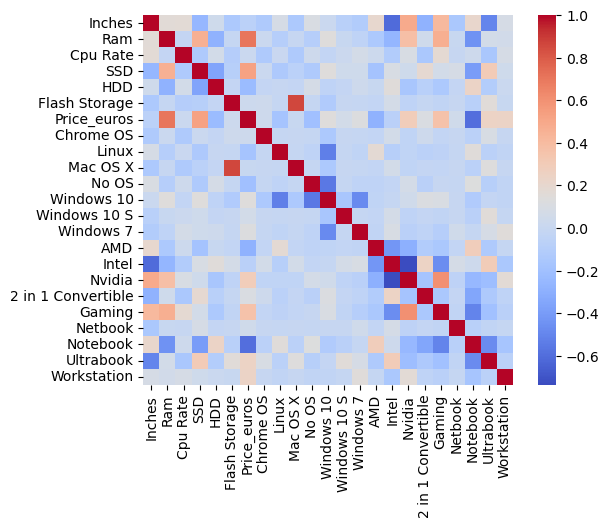

In [369]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции

Проверим, есть ли пропущенные значения этапом ниже:

In [370]:
data.isna().sum()  

Company               0
Product               0
Inches                0
ScreenResolution      0
Ram                   0
Cpu Brand             0
Cpu Model             0
Cpu Rate              0
SSD                   0
HDD                   0
Flash Storage         0
Gpu Model             0
Price_euros           0
Chrome OS             0
Linux                 0
Mac OS X              0
No OS                 0
Windows 10            0
Windows 10 S          0
Windows 7             0
AMD                   0
Intel                 0
Nvidia                0
2 in 1 Convertible    0
Gaming                0
Netbook               0
Notebook              0
Ultrabook             0
Workstation           0
dtype: int64

# Проведем нормализацию

Выполним стандартизацию всех признаков:

In [371]:
data.head()

,Company,Product,Inches,ScreenResolution,Ram,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,HP,250 G6,15.6,Full HD 1920x1080,8,Intel,Core i5 7200U,2.0,256,0,...,0,0,1,0,0,0,0,1,0,0
1,Acer,Aspire 3,15.6,1366x768,4,AMD,A9-Series 9420,3.0,0,500,...,0,1,0,0,0,0,0,1,0,0
2,Asus,ZenBook UX430UN,14.0,Full HD 1920x1080,16,Intel,Core i7 8550U,1.0,512,0,...,0,0,0,1,0,0,0,0,1,0
3,Acer,Swift 3,14.0,IPS Panel Full HD 1920x1080,8,Intel,Core i5 8250U,1.0,256,0,...,0,0,1,0,0,0,0,0,1,0
4,HP,250 G6,15.6,1366x768,4,Intel,Core i5 7200U,2.0,0,500,...,0,0,1,0,0,0,0,1,0,0


In [372]:
data['Product'].dtype
column_for_remove=["Product"]
data = data.drop(columns = column_for_remove)

data['Company'].dtype
column_for_remove=["Company"]
data = data.drop(columns = column_for_remove)

data['ScreenResolution'].dtype
column_for_remove=["ScreenResolution"]
data = data.drop(columns = column_for_remove)

data['Cpu Brand'].dtype
column_for_remove=["Cpu Brand"]
data = data.drop(columns = column_for_remove)

data['Gpu Model'].dtype
column_for_remove=["Gpu Model"]
data = data.drop(columns = column_for_remove)

data['Cpu Model'].dtype
column_for_remove=["Cpu Model"]
data = data.drop(columns = column_for_remove)

data.head()

,Inches,Ram,Cpu Rate,SSD,HDD,Flash Storage,Price_euros,Chrome OS,Linux,Mac OS X,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,15.6,8,2.0,256,0,0,575.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,15.6,4,3.0,0,500,0,400.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,14.0,16,1.0,512,0,0,1495.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,14.0,8,1.0,256,0,0,770.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,15.6,4,2.0,0,500,0,393.9,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [373]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()
data_stand

,Inches,Ram,Cpu Rate,SSD,HDD,Flash Storage,Price_euros,Chrome OS,Linux,Mac OS X,...,Windows 7,AMD,Intel,Nvidia,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,0.347697,-0.167135,0.330904,0.422472,-0.316387,-0.072648,-0.988079,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,0.982083,-0.722279,-0.319297,-0.462541,-0.0729,0.911731,-0.429872,-0.156105
1,0.347697,-1.032577,2.783488,-1.180001,3.195511,-0.072648,-1.268729,-0.05947,-0.216910,-0.05947,...,-0.19844,2.396858,-1.017346,-0.722279,-0.319297,-0.462541,-0.0729,0.911731,-0.429872,-0.156105
2,-0.866899,1.563747,-2.121680,2.024944,-0.316387,-0.072648,0.487333,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,-1.017346,1.383285,-0.319297,-0.462541,-0.0729,-1.095848,2.324223,-0.156105
3,-0.866899,-0.167135,-2.121680,0.422472,-0.316387,-0.072648,-0.675356,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,0.982083,-0.722279,-0.319297,-0.462541,-0.0729,-1.095848,2.324223,-0.156105
4,0.347697,-1.032577,0.330904,-1.180001,3.195511,-0.072648,-1.278511,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,0.982083,-0.722279,-0.319297,-0.462541,-0.0729,0.911731,-0.429872,-0.156105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.347697,-0.167135,0.330904,-1.180001,-0.309363,-0.072648,-0.617639,-0.05947,4.606145,-0.05947,...,-0.19844,2.396858,-1.017346,-0.722279,-0.319297,-0.462541,-0.0729,0.911731,-0.429872,-0.156105
1142,0.347697,-1.032577,0.330904,-1.180001,3.195511,-0.072648,-0.755028,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,-1.017346,1.383285,-0.319297,-0.462541,-0.0729,0.911731,-0.429872,-0.156105
1143,-0.866899,-1.032577,0.330904,-0.378765,-0.316387,-0.072648,-0.887046,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,0.982083,-0.722279,3.129115,-0.462541,-0.0729,-1.095848,-0.429872,-0.156105
1144,-1.398285,1.563747,0.330904,2.024944,-0.316387,-0.072648,0.493748,-0.05947,-0.216910,-0.05947,...,-0.19844,-0.416845,0.982083,-0.722279,3.129115,-0.462541,-0.0729,-1.095848,-0.429872,-0.156105


# Обучающая и тестовые выборки

In [374]:
from sklearn.model_selection import train_test_split

x = data_stand.drop(columns=['Price_euros'])  # Признаки (все столбцы, кроме 'Price')
y = data_stand['Price_euros']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки (70% для обучения, 30% для тестирования)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Проверяем размеры выборок
print("Размер обучающей выборки:", x_train.shape, y_train.shape)
print("Размер тестовой выборки:", x_test.shape, y_test.shape)

Размер обучающей выборки: (793, 22) (793,)
Размер тестовой выборки: (341, 22) (341,)


In [375]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Инициализируем модель k-ближайших соседей для регрессии
knn = KNeighborsRegressor(n_neighbors=5)  # n_neighbors - количество соседей (обычно 3-5)

# Обучаем модель на обучающей выборке
knn.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = knn.predict(x_test)

# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.37477214737693826
R^2 Score: 0.5984542153342425


# Вывод

В результате работы с моделью k-ближайших соседей для предсказания цены ноутбуков получили:
    Среднеквадратичная ошибка получилась примерно 0.375, что указывает на достаточно большую разницу между предсказанными и реальными ценами. Модель использовала 5 ближайших соседей для каждого предсказаания. Это стандартное значение, но его стоит оптимизировать.
    Коэффициент детерминации составил 0.598, то есть модель объясняет около 60% вариаций в ценах ноутбуков. Это говорит о том, что модель предсказывает цены неплохо, но не идеально.